In [1]:
import os
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Building Data Loading Function
- Decoding audio file into string and amplitude

In [2]:
# this function decodes our audio file
def load_wav_16k_mono(filename):
    # load encoded wav file
    file_contents = tf.io.read_file(filename)
    # decode wav (tensors by channel)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    
    # remove trailing axis
    wav = tf.squeeze(wav, axis=1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # goes from 44.1kHz to 16kHz: amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
    return wav

### Plot Wave

In [3]:
wave = load_wav_16k_mono('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC216010-4.wav')
nWave = load_wav_16k_mono('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/curlew-sound-3.wav')

2023-01-17 16:43:38.562412: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-17 16:43:38.784860: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX2 FMA
2023-01-17 16:43:39.095006: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [22]:
wave

<tf.Tensor: shape=(56000,), dtype=float32, numpy=
array([-4.2080745e-07,  6.8223898e-07, -4.4688531e-07, ...,
       -1.3327588e-02, -1.9908303e-02,  2.3853235e-02], dtype=float32)>

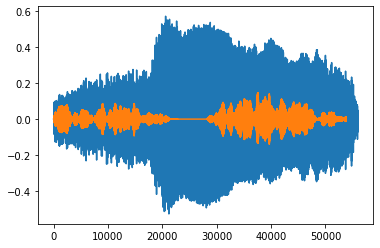

In [4]:
plt.plot(wave)
plt.plot(nWave)
plt.show()

- Blue: Capuchin Bird
- Orange: Another Bird

# Create Tensorflow DataSet

### Define Path to Positive and Negative Data

In [5]:
POS = os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips')
NEG = os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Not_Capuchinbird_Clips')

- Reach every .wav file in the path
- Add file in Tensorflow Dataset

In [6]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [7]:
pos.as_numpy_iterator().next()

b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC3776-4.wav'

### Add Labels and combine Positive and Negative Samples

In [8]:
positive = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negative = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

In [9]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [10]:
data = positive.concatenate(negative)

In [19]:
data.as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC22397-6.wav',
 1.0)

### Calcualte the Average Length of Capuchin Bird Call

In [24]:
length=[]
for file in os.listdir(os.path.join('../input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('../input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips', file))
    length.append(len(tensor_wave))

In [28]:
len(length)

217

### Claculate Mean, Min, Max of Capuchin Bird Call

In [30]:
tf.math.reduce_mean(length)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [32]:
tf.math.reduce_min(length)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [33]:
tf.math.reduce_max(length)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

We have 16k HZ frequency which means 16000 cycle per second
- 54156/16000 = 3.38 is average capuchin bird call time
- 32000/16000 = 2 sec is min time in length
- 80000/16000 = 5 sec is max time in length

In [34]:
48000/16000

3.0

# Pre-Processing Function to convert Audio Data into Spectogram

In [36]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)

#   As we know average lenght for time taken by Capuchin bird is 3Sec
    wav = wav[:48000]
#   We know minimum length is 32000, so we will add padding of zero to rest of left sapce
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    
#   We have to expand our dimension to train it through CNN model
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    
    return spectrogram, label

### Test Function and visualize Spectogram

In [38]:
filePath, label = data.as_numpy_iterator().next()

In [39]:
spectogram, label = preprocess(filePath, label)

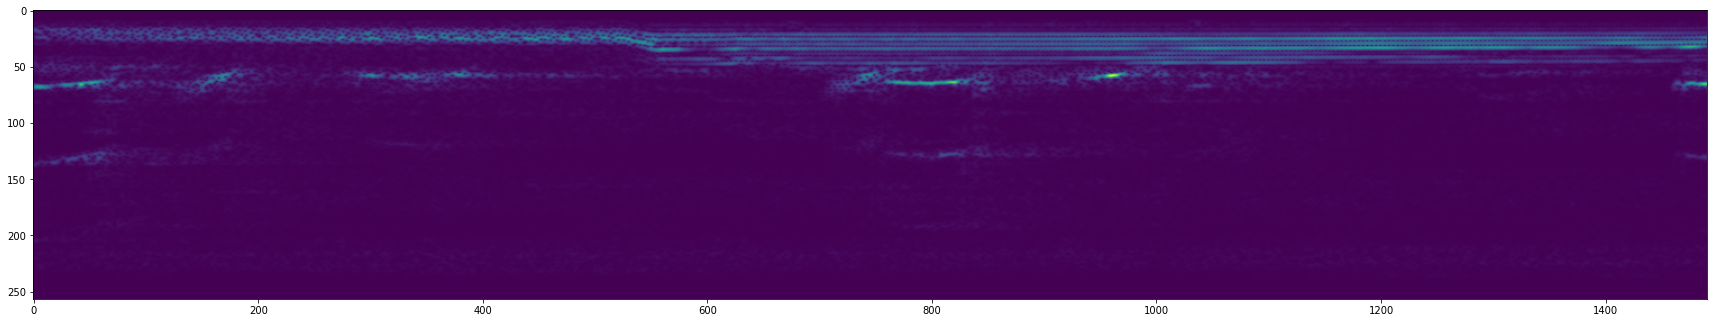

In [41]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectogram)[0])
plt.show()

# Train-Test Split

## Create Tesorflow DataPipeline

In [42]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

## Spliting into Train-Test

In [43]:
train = data.take(36)
test = data.skip(36).take(15)

# Building Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [45]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1489, 255, 16)     160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1487, 253, 16)     2320      
_________________________________________________________________
flatten (Flatten)            (None, 6019376)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               770480256 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 770,482,865
Trainable params: 770,482,865
Non-trainable params: 0
_________________________________________________________________


In [48]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4


2023-01-17 18:00:20.269393: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 346 of 1000
2023-01-17 18:00:30.283561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 671 of 1000
2023-01-17 18:00:34.537604: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


36/36 [==============================] - 174s 4s/step - loss: 2.3798 - recall: 0.9122 - precision: 0.8824 - val_loss: 0.0169 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 2/4
36/36 [==============================] - 143s 4s/step - loss: 0.0732 - recall: 0.9873 - precision: 0.9750 - val_loss: 0.0022 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 143s 4s/step - loss: 0.0208 - recall: 0.9870 - precision: 0.9870 - val_loss: 0.0018 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/4
36/36 [==============================] - 143s 4s/step - loss: 0.0033 - recall: 0.9937 - precision: 1.0000 - val_loss: 0.0047 - val_recall: 1.0000 - val_precision: 1.0000
